In [1]:
%cd ..

D:\Tesis\REPO\Cloud-Classification\code


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
import os
from torchvision.io import read_image
import torchvision.transforms as T
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx

In [46]:
from tqdm import tqdm
from scipy import stats

In [6]:
from src import config
from src import engine
from src import utils

Using backend: pytorch


In [7]:
from recipe.utils import *

In [8]:
torch.manual_seed(7)
np.random.seed(7)

---

In [9]:
def get_targets(paths):
        return list(map(int,list(map(int,[os.path.basename(x).split('_')[0] 
                                          for x in paths]))))

---

# Read Data

In [10]:
paths = utils.get_gcd_paths('D:\Tesis\REPO','train')
targets = get_targets(paths)

df_train = pd.DataFrame({'path':paths, 'target':targets})

# Mean and STD by channel

In [34]:
meanR = list()
stdR = list()

meanG = list()
stdG = list()

meanB = list()
stdB = list()

for path in tqdm(paths):
    
    img = read_image(path).float()
    
    meanR.append(img[0,:,:].mean().item())
    meanG.append(img[1,:,:].mean().item())
    meanB.append(img[2,:,:].mean().item())
    
    
    stdR.append(img[0,:,:].std().item())
    stdG.append(img[1,:,:].std().item())
    stdB.append(img[2,:,:].std().item())

df_stats = pd.DataFrame(
    {
        #mean
        'meanR': meanR,
        'meanG': meanG,
        'meanB': meanB,
        #std
        'stdR': stdR,
        'stdG': stdG,
        'stdB': stdB,
    }
)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:29<00:00, 344.56it/s]


In [39]:
final_stats = df_stats.mean(0).to_dict()

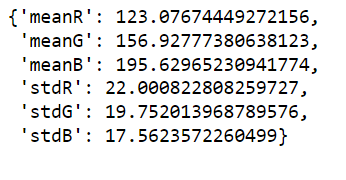

In [40]:
final_stats

{'meanR': 123.07674449272156,
 'meanG': 156.92777380638123,
 'meanB': 195.62965230941774,
 'stdR': 22.000822808259727,
 'stdG': 19.752013968789576,
 'stdB': 17.5623572260499}

In [41]:
def norm_plot(curves, title):
    """
    Plots normal distribution curves
    curves: list of tuples like: (mu, sigma, label)
    """
    fig, ax = plt.subplots()
    for mu, sigma, label in curves:
        x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
        ax.plot(x, stats.norm.pdf(x, mu, sigma), label=label)

    ax.set_title(title)
    ax.legend()

In [44]:
curves = [
    (final_stats["meanR"],final_stats["stdR"],'R Channel'),
    (final_stats["meanG"],final_stats["stdG"],'G Channel'),
    (final_stats["meanB"],final_stats["stdB"],'B Channel'),
]

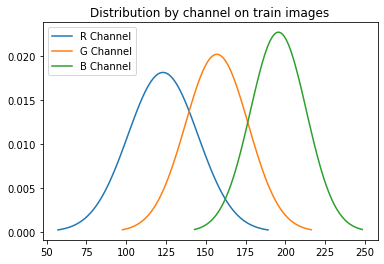

In [49]:
norm_plot(curves, 'Distribution by channel on train images')